In [2]:
!pip install python-resize-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
! pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
from skimage import color
from PIL import Image
import imageio
from resizeimage import resizeimage



In [4]:
#drive.mount('/content/drive')

In [5]:
#files.upload()

In [6]:
#! mkdir ~/.kaggle

In [7]:
#! cp kaggle.json ~/.kaggle/

In [8]:
#! chmod 600 ~/.kaggle/kaggle.json

In [9]:
#!kaggle datasets download -d validmodel/indo-fashion-dataset

In [10]:
#!unzip -q indo-fashion-dataset.zip

In [5]:
df_train = pd.read_json('/kaggle/input/indo-fashion-dataset/train_data.json', lines=True)

In [6]:
df_train.head()

,image_url,image_path,brand,product_title,class_label,color
0,https://m.media-amazon.com/images/I/81XKaSKvly...,images/train/0.jpeg,Womanista,Women's Georgette Saree with Blouse Piece (TKI...,saree,NaN
1,https://m.media-amazon.com/images/I/91dDMDg+QT...,images/train/1.jpeg,Yashika,Women Linen Printed Sarees Free Size (BEE),saree,NaN
2,https://m.media-amazon.com/images/I/71TJ9p46PV...,images/train/2.jpeg,Womanista,Organza Floral Print Saree with Blouse Piece(W...,saree,NaN
3,https://m.media-amazon.com/images/I/81Y+je7CEg...,images/train/3.jpeg,PERFECTBLUE,Women's Digital Cotton Linen Blend Saree with ...,saree,NaN
4,https://m.media-amazon.com/images/I/61B8o9Ulqp...,images/train/4.jpeg,VAIVIDHYAM,Designer Sarees Women's Banarasi Cotton Silk S...,saree,NaN


In [7]:
df_train.drop(['image_url', 'brand', 'product_title', 'color'], axis=1, inplace=True)

In [8]:
df_train.head()

,image_path,class_label
0,images/train/0.jpeg,saree
1,images/train/1.jpeg,saree
2,images/train/2.jpeg,saree
3,images/train/3.jpeg,saree
4,images/train/4.jpeg,saree


In [9]:
#df_train.to_csv('/content/drive/My Drive/capstone_3/df_train.csv')

In [10]:
df_test = pd.read_json('/kaggle/input/indo-fashion-dataset/test_data.json', lines = True)

In [11]:
df_test.head()

,image_url,image_path,brand,product_title,class_label,color
0,https://m.media-amazon.com/images/I/71NZQ-aaAS...,images/test/0.jpeg,TANTUJA BENGAL HANDLOOM,(A Govt. of West Bengal Enterprises) Handloom ...,saree,NaN
1,https://m.media-amazon.com/images/I/81aQmbWsG7...,images/test/1.jpeg,Trilok Fab,Women's Silk Saree With Blouse Piece,saree,NaN
2,https://m.media-amazon.com/images/I/71YjGvzs9y...,images/test/2.jpeg,Nine Sister,Women's Georgette Net Embroidered Saree with B...,saree,NaN
3,https://m.media-amazon.com/images/I/81JYhYV5Xr...,images/test/3.jpeg,Gauri Laxmi Enterprise,Women's Crepe Saree with Blouse (GLE$CHICKOO C...,saree,NaN
4,https://m.media-amazon.com/images/I/91fXc5i5Dy...,images/test/4.jpeg,SOURBH,Women's Cotton Blend Digital Butta Printed Sar...,saree,NaN


In [12]:
df_test.drop(['image_url', 'brand', 'product_title', 'color'], axis=1, inplace=True)

In [13]:
df_test.head()

,image_path,class_label
0,images/test/0.jpeg,saree
1,images/test/1.jpeg,saree
2,images/test/2.jpeg,saree
3,images/test/3.jpeg,saree
4,images/test/4.jpeg,saree


In [14]:
#df_test.to_csv('/content/drive/My Drive/capstone_3/df_test.csv')

In [15]:
df_val = pd.read_json('/kaggle/input/indo-fashion-dataset/val_data.json', lines=True)

In [16]:
df_val.head()

,image_url,image_path,brand,product_title,class_label,color
0,https://m.media-amazon.com/images/I/81LOPbFPiQ...,images/val/0.jpeg,Generic,Women's Khadi Cotton Saree With Blouse Piece (...,saree,NaN
1,https://m.media-amazon.com/images/I/81Q8Oktw4s...,images/val/1.jpeg,Yashvi Designer,Women's Net Saree With Unstitched Blouse Piece,saree,NaN
2,https://m.media-amazon.com/images/I/613S1YGCmo...,images/val/2.jpeg,Aarrah,Georgette Strip Print Saree[S_SHIKHA30021SR02_...,saree,NaN
3,https://m.media-amazon.com/images/I/819budhQl1...,images/val/3.jpeg,MIMOSA,Women's Patola Style Art Silk Saree (Green),saree,NaN
4,https://m.media-amazon.com/images/I/61cAZ94ZQV...,images/val/4.jpeg,Generic,Women's Pure Hand Block Patola Printed Cotton ...,saree,NaN


In [17]:
df_val.drop(['image_url', 'brand', 'product_title', 'color'], axis=1, inplace=True)

In [18]:
df_val.head()

,image_path,class_label
0,images/val/0.jpeg,saree
1,images/val/1.jpeg,saree
2,images/val/2.jpeg,saree
3,images/val/3.jpeg,saree
4,images/val/4.jpeg,saree


In [19]:
#df_val.to_csv('/kaggle/working/df_val.csv')

In [20]:
#df_train = pd.read_csv('/content/drive/My Drive/capstone_3/df_train.csv')

In [21]:
#df_train.head()

In [22]:
#df_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
#df_train.head()

In [24]:
#df_train.tail()

In [25]:
#df_val = pd.read_csv('/content/drive/My Drive/capstone_3/df_val.csv')

In [26]:
#df_val.head()

In [27]:
#df_val.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
#df_val.head()

In [20]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')
img.shape

/tmp/ipykernel_2474/797019605.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')


(194, 320, 3)

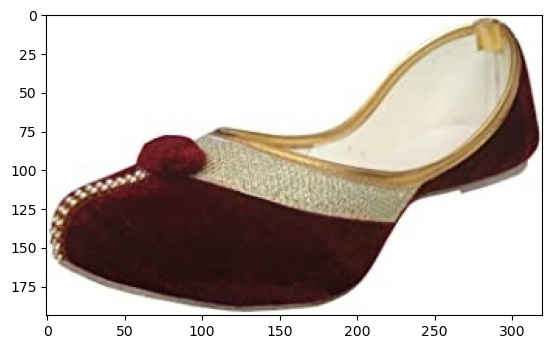

In [21]:
plt.imshow(img)

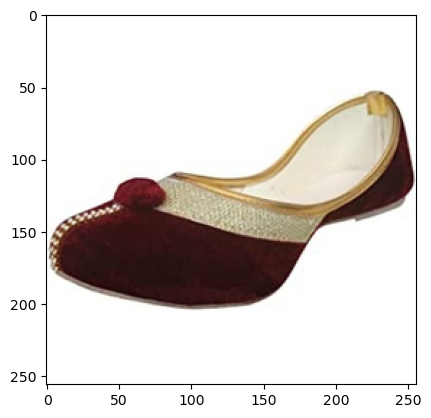

In [22]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_60000_resized-image.jpg', img.format)
plt.imshow(img)

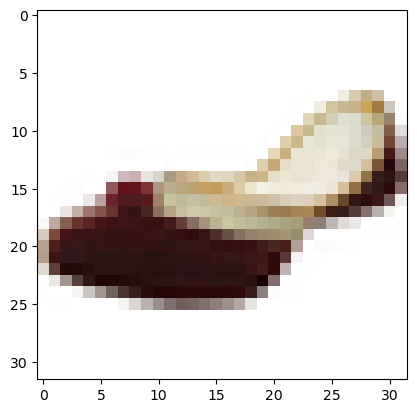

In [23]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [32, 32])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_60000_resized-image.jpg', img.format)
plt.imshow(img)

In [ ]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/0.jpeg')
img.shape

In [ ]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_60000_resized-image.jpg', img.format)
plt.imshow(img)

In [ ]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/0.jpeg')
img.shape

In [ ]:
plt.imshow(img)

In [ ]:

img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/0.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_0_resized-image.jpg', img.format)



In [ ]:
plt.imshow(img)

In [ ]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/20000.jpeg')
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/20000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_20000_resized-image.jpg', img.format)


In [ ]:
plt.imshow(img)

In [29]:
df_train = pd.get_dummies(data=df_train, columns=['class_label'])

In [30]:
df_train.head()

,image_path,class_label_blouse,class_label_dhoti_pants,class_label_dupattas,class_label_gowns,class_label_kurta_men,class_label_leggings_and_salwars,class_label_lehenga,class_label_mojaris_men,class_label_mojaris_women,class_label_nehru_jackets,class_label_palazzos,class_label_petticoats,class_label_saree,class_label_sherwanis,class_label_women_kurta
0,images/train/0.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,images/train/1.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,images/train/2.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,images/train/3.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,images/train/4.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
df_val = pd.get_dummies(data=df_val, columns=['class_label'])

In [32]:
df_val.head()

,image_path,class_label_blouse,class_label_dhoti_pants,class_label_dupattas,class_label_gowns,class_label_kurta_men,class_label_leggings_and_salwars,class_label_lehenga,class_label_mojaris_men,class_label_mojaris_women,class_label_nehru_jackets,class_label_palazzos,class_label_petticoats,class_label_saree,class_label_sherwanis,class_label_women_kurta
0,images/val/0.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,images/val/1.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,images/val/2.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,images/val/3.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,images/val/4.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
df_test = pd.get_dummies(data=df_test, columns=['class_label'])

In [34]:
df_train.columns

Index(['image_path', 'class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta'],
      dtype='object')

In [ ]:
#resized_imgs = []
#for i in range(len(df_train)):
  #img = Image.open(f'/content/images/train/{i}.jpeg')
  #img = resizeimage.resize_contain(img, [256, 256])
  #img = img.convert("RGB")
  #resized_imgs.append(img)
# requires too much ram

In [ ]:
#train_datagen=ImageDataGenerator(rescale=1./255)
#train_generator=datagen.flow_from_dataframe(dataframe=df_train, directory='/content', x_col='image_path', y_col='class_label', class_mode='categorical', target_size=(32,32), batch_size=32, seed=26, save_to_dir='/content/drive/My Drive/capstone_3/preprocessed_data', )

In [35]:
# Creating generator images sizes 256 x 256
columns = ['class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta']
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(256,256), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

KeyboardInterrupt: 

In [ ]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=df_val, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(256,256), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

In [ ]:
# most of code is from https://saturncloud.io/blog/how-to-handle-different-image-sizes-in-tensorflow-cnn-training/#:~:text=Solution%202%3A%20Use%20Variable%20Input,keras.
# Thursday, July 06, 2023

#def resize_image(image, size=(256, 256)):
    #return tf.image.resize(image, size)

#train_dataset = tf.data.Dataset.list_files('/content/images/train/*.jpg')
#train_dataset = train_dataset.map(lambda x: tf.io.read_file(x))

#train_dataset = train_dataset.map(lambda x: tf.image.decode_jpeg(x, channels=3))

# Apply resizing to dataset
#train_dataset = train_dataset.map(lambda x: resize_image(x, size=(256, 256)))

#val_dataset = tf.data.Dataset.list_files('/content/images/val/*.jpg')
#val_dataset = val_dataset.map(lambda x: tf.io.read_file(x))

#val_dataset = val_dataset.map(lambda x: tf.image.decode_jpeg(x, channels=3))

#val_dataset = val_dataset.map(lambda x: resize_image(x, size=(256, 256)))

In [ ]:
# Setting up model
img_width, img_height = 256, 256

train_data = train_generator
val_data = val_generator
nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 50
batch_size = 16



input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(
    x=train_generator,
    y=None,
    validation_data=val_generator,
    epochs=5,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=3,
    validation_batch_size=batch_size,
    validation_freq=4,
    max_queue_size=10,
    use_multiprocessing=True,
    workers=6)



Now trying smaller images

In [30]:
# Creating generator for 32 x 32 sized images
columns = ['class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta']
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(32,32), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 91166 validated image filenames.


In [31]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=df_val, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(32,32), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 7500 validated image filenames.


In [32]:
# Setting up model
img_width, img_height = 32, 32

train_data = train_generator
val_data = val_generator
nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 50
batch_size = 16



input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
model.fit(
    x=train_generator,
    y=None,
    validation_data=val_generator,
    epochs=50,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=3,
    validation_batch_size=batch_size,
    validation_freq=4,
    max_queue_size=10,
    use_multiprocessing=True,
    workers=6)



Epoch 1/50
2849/2849 [==============================] - 217s 74ms/step - loss: 1.3831 - accuracy: 0.5580
Epoch 2/50
2849/2849 [==============================] - 198s 69ms/step - loss: 1.0064 - accuracy: 0.6766
Epoch 3/50
2849/2849 [==============================] - 197s 69ms/step - loss: 0.9100 - accuracy: 0.7082
Epoch 4/50
2849/2849 [==============================] - 197s 69ms/step - loss: 0.8566 - accuracy: 0.7253 - val_loss: 0.7467 - val_accuracy: 0.7083
Epoch 5/50
1783/2849 [=================>............] - ETA: 1:19 - loss: 0.8175 - accuracy: 0.7386

UnknownError: Graph execution error:

2 root error(s) found.
  (0) UNKNOWN:  OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")
OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 870, in get
    raise e

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 861, in get
    inputs = self.queue.get(block=True, timeout=5).get()

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 774, in get
    raise self._value

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))

  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")

OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")
OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 870, in get
    raise e

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 861, in get
    inputs = self.queue.get(block=True, timeout=5).get()

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 774, in get
    raise self._value

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))

  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")

OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1414]

In [36]:
# Creating generator for 64 x 64 sized images
columns = ['class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta']
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(64,64), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 91166 validated image filenames.


In [37]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=df_val, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(64,64), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 7500 validated image filenames.


In [38]:
# Setting up model
img_width, img_height = 64, 64

train_data = train_generator
val_data = val_generator
nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 50
batch_size = 16



input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
model.fit(
    x=train_generator,
    y=None,
    validation_data=val_generator,
    epochs=10,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=3,
    validation_batch_size=batch_size,
    validation_freq=4,
    max_queue_size=10,
    use_multiprocessing=True,
    workers=6)



Epoch 1/10
2849/2849 [==============================] - 221s 73ms/step - loss: 1.2183 - accuracy: 0.6116
Epoch 2/10
2849/2849 [==============================] - 191s 67ms/step - loss: 0.8781 - accuracy: 0.7171
Epoch 3/10
2849/2849 [==============================] - 195s 68ms/step - loss: 0.7809 - accuracy: 0.7487
Epoch 4/10
2849/2849 [==============================] - 198s 69ms/step - loss: 0.7188 - accuracy: 0.7681 - val_loss: 0.5665 - val_accuracy: 0.8021
Epoch 5/10
2849/2849 [==============================] - 198s 69ms/step - loss: 0.6755 - accuracy: 0.7809
Epoch 6/10
2849/2849 [==============================] - 200s 70ms/step - loss: 0.6419 - accuracy: 0.7899
Epoch 7/10
2849/2849 [==============================] - 198s 69ms/step - loss: 0.6160 - accuracy: 0.7993
Epoch 8/10
2849/2849 [==============================] - 200s 70ms/step - loss: 0.5875 - accuracy: 0.8066 - val_loss: 0.5409 - val_accuracy: 0.8646
Epoch 9/10
2849/2849 [==============================] - 196s 69ms/step - los

In [44]:
inputs = model.input
outputs = [model.layers[i].output for i in range(2,len(model.layers))]
mod = Model(inputs, outputs)

In [2]:
#image = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')

In [3]:
#all_layers_predictions = mod.predict(image)

In [ ]:
image1_channel8_fromlayer10 = all_layers_predictions[10][1,:,:,8]